In [2]:
import pandas as pd
import matplotlib.pyplot as plt

In [7]:
para = pd.read_csv('para_normalized.csv', delimiter=',')
para1 = pd.read_csv('data_key_para_n.csv', delimiter=',')
#para2=pd.read_csv('para.csv', delimiter=',')
#para3=para.merge(para2, how='left', on='Model')
#para3.drop(para3.iloc[:,1:10], axis=1, inplace=True)
#para3.drop(columns=['Modus'], inplace=True)
#para3 = para3.rename(columns={'k1_y': 'k1','k2_y': 'k2','k3_y': 'k3','k9_y': 'k9','k4_y': 'k4','k5_y': 'k5','k6_y': 'k6','k7_y': 'k7','k8_y': 'k8'})

In [8]:
def getP_th(x,y,k4,k5,k6,k7,k8,k9):#x:tin, y:tout k4-k9: paramters for COP and Pel
    pth=k4*k7*x*x+(k4*k8+k5*k7)*x*y+(k4*k9+k6*k7)*x+(k6*k8+k5*k9)*y+k6*k9+k5*k8*y*y
    return pth

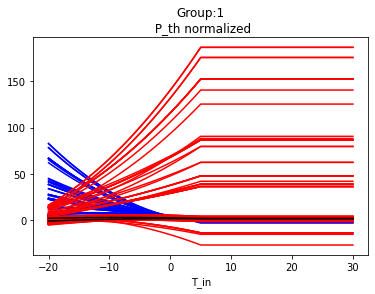

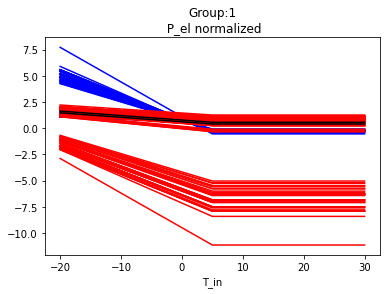

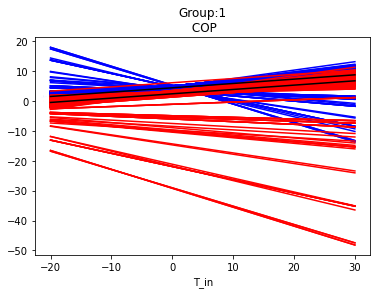

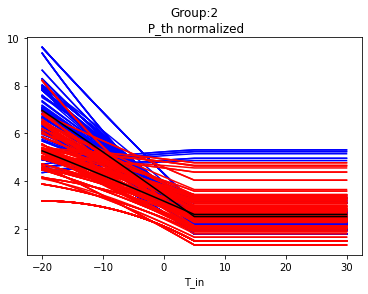

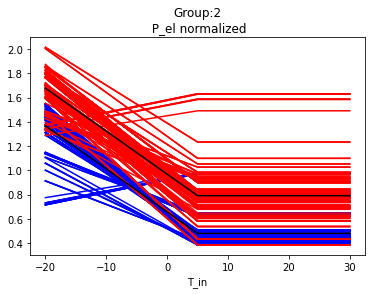

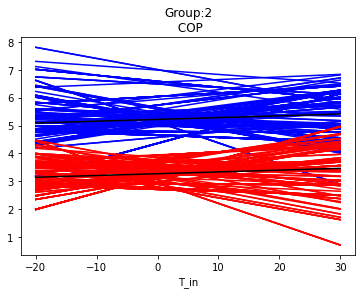

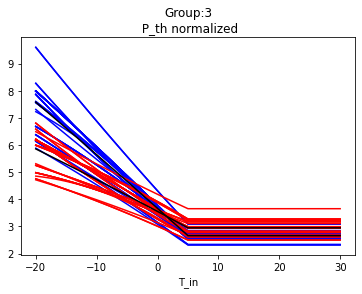

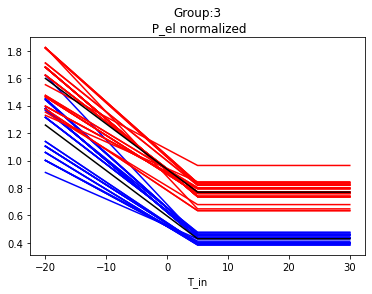

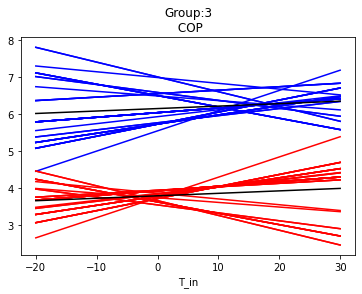

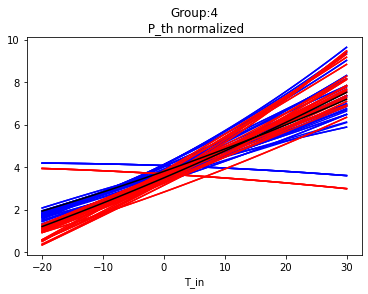

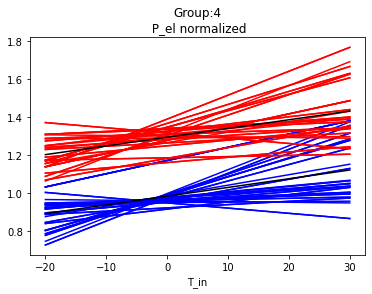

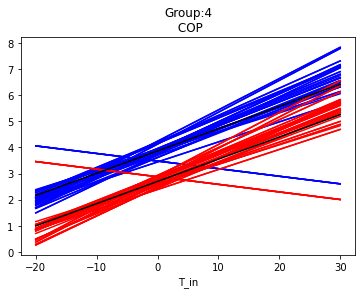

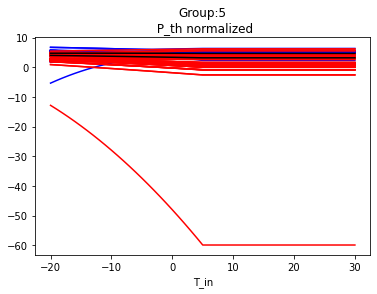

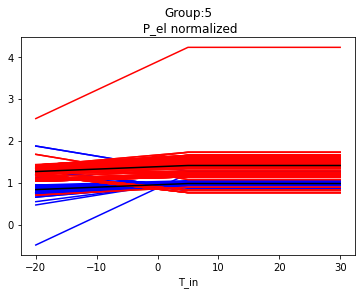

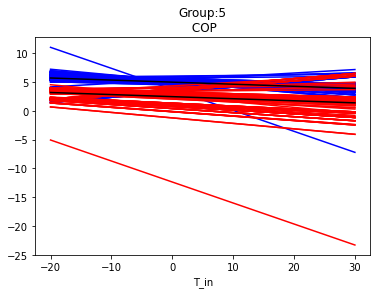

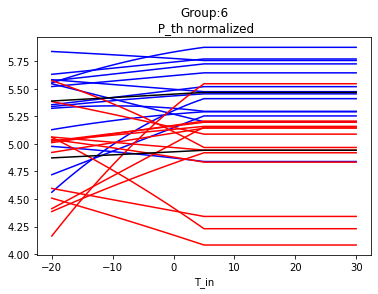

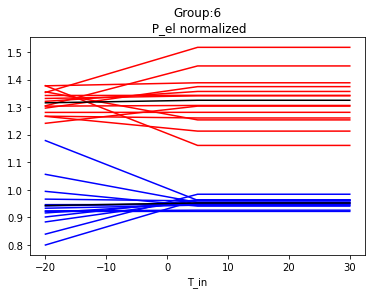

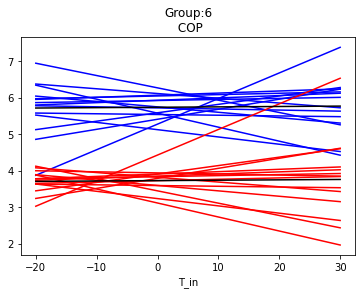

In [9]:
#Plot Pth, Pel, COP for choosen models
Groups=[*range(1,7,1)] #define wich groups to plot
for groups_c in Groups:
    Group1=para.loc[para['Group']==groups_c,:] 
    T_in=[*range(-20,31,1)]#inflow TEMP
    T_out=[30,50]
    #get parameters
    K1=Group1['k1'].values.tolist() 
    K2=Group1['k2'].values.tolist()
    K3=Group1['k3'].values.tolist()
    K4=Group1['k4'].values.tolist()
    K5=Group1['k5'].values.tolist()
    K6=Group1['k6'].values.tolist()
    K7=Group1['k7'].values.tolist()
    K8=Group1['k8'].values.tolist()
    K9=Group1['k9'].values.tolist()
    Models= Group1['Model'].values.tolist()
    i=0 #iterator for-loop
    #create Dataframes to plot
    P_th_low_g=pd.DataFrame()
    P_th_low_g['T_in']=T_in
    P_th_high_g=pd.DataFrame()
    P_th_high_g['T_in']=T_in
    P_el_low_g=pd.DataFrame()
    P_el_low_g['T_in']=T_in
    P_el_high_g=pd.DataFrame()
    P_el_high_g['T_in']=T_in
    COP_low_g=pd.DataFrame()
    COP_low_g['T_in']=T_in
    COP_high_g=pd.DataFrame()
    COP_high_g['T_in']=T_in
    Average_g=pd.DataFrame()
    Average_g['T_in']=T_in
    #get average values
    k1_average=Group1['k1'].mean(0)
    k2_average=Group1['k2'].mean(0)
    k3_average=Group1['k3'].mean(0)
    k4_average=Group1['k4'].mean(0)
    k5_average=Group1['k5'].mean(0)
    k6_average=Group1['k6'].mean(0)
    k7_average=Group1['k7'].mean(0)
    k8_average=Group1['k8'].mean(0)
    k9_average=Group1['k9'].mean(0)
    
    for number in K1: #iterate by all models
        P_th_low=[]
        P_th_high=[]
        P_el_low=[]
        P_el_high=[]
        COP_low=[]
        COP_high=[]
        Average_pth_low=[]
        Average_pel_low=[]
        Average_cop_low=[]
        Average_pth_high=[]
        Average_pel_high=[]
        Average_cop_high=[]
        for tin in T_in: #calculate Thermal and electric Power and COP
            if tin>5: #this is the temperature where inverter Heatpumps use minimum energy
                if groups_c== (4 or 5 or 6):
                    p_th_low = getP_th(tin,T_out[0],K4[i],K5[i],K6[i],K7[i],K8[i],K9[i])
                    p_th_high = getP_th(tin,T_out[1],K4[i],K5[i],K6[i],K7[i],K8[i],K9[i])
                    p_el_low = K4[i] * tin + K5[i] * T_out[0] + K6[i]
                    p_el_high = K4[i] * tin + K5[i] * T_out[1] + K6[i]
                    average_pthlow = getP_th(tin,T_out[0],k4_average,k5_average,k6_average,k7_average,k8_average,k9_average)
                    average_pthhigh = getP_th(tin,T_out[1],k4_average,k5_average,k6_average,k7_average,k8_average,k9_average)
                    average_pellow= k4_average * tin + k5_average * T_out[0] + k6_average
                    average_pelhigh= k4_average * tin + k5_average * T_out[1] + k6_average
                else:
                    p_th_low = getP_th(5,T_out[0],K4[i],K5[i],K6[i],K7[i],K8[i],K9[i])
                    p_th_high = getP_th(5,T_out[1],K4[i],K5[i],K6[i],K7[i],K8[i],K9[i])
                    p_el_low = K4[i] * 5 + K5[i] * T_out[0] + K6[i]
                    p_el_high = K4[i] * 5 + K5[i] * T_out[1] + K6[i]
                    average_pthlow = getP_th(5,T_out[0],k4_average,k5_average,k6_average,k7_average,k8_average,k9_average)
                    average_pthhigh = getP_th(5,T_out[1],k4_average,k5_average,k6_average,k7_average,k8_average,k9_average)
                    average_pellow= k4_average * 5 + k5_average * T_out[0] + k6_average
                    average_pelhigh= k4_average * 5 + k5_average * T_out[1] + k6_average
            else:
                p_th_low = getP_th(tin,T_out[0],K4[i],K5[i],K6[i],K7[i],K8[i],K9[i])
                p_th_high = getP_th(tin,T_out[1],K4[i],K5[i],K6[i],K7[i],K8[i],K9[i])
                p_el_low = K4[i] * tin + K5[i] * T_out[0] + K6[i]
                p_el_high = K4[i] * tin + K5[i] * T_out[1] + K6[i]
                average_pthlow = getP_th(tin,T_out[0],k4_average,k5_average,k6_average,k7_average,k8_average,k9_average)
                average_pthhigh = getP_th(tin,T_out[1],k4_average,k5_average,k6_average,k7_average,k8_average,k9_average)
                average_pellow= k4_average * tin + k5_average * T_out[0] + k6_average
                average_pelhigh= k4_average * tin + k5_average * T_out[1] + k6_average
            P_th_low.append(p_th_low)
            P_th_high.append(p_th_high)
            P_el_low.append(p_el_low)
            P_el_high.append(p_el_high)
            cop_low = K7[i] * tin + K8[i] * T_out[0] + K9[i]
            #if cop_low<1:
                #cop_low=1
            COP_low.append(cop_low)
            cop_high = K7[i] * tin + K8[i] * T_out[1] + K9[i]
            #if cop_high<1:
                #cop_high=1
            COP_high.append(cop_high)
            #calculate for average values
            Average_pth_low.append(average_pthlow)
            Average_pth_high.append(average_pthhigh)
            Average_pel_low.append(average_pellow)
            Average_pel_high.append(average_pelhigh)
            average_low= k7_average * tin + k8_average * T_out[0] + k9_average
            average_high= k7_average * tin + k8_average * T_out[1] + k9_average
            Average_cop_low.append(average_low)
            Average_cop_high.append(average_high)

        #write values in a dataframe
        P_th_low_g[Models[i]]=P_th_low
        P_th_high_g[Models[i]]=P_th_high
        P_el_low_g[Models[i]]=P_el_low
        P_el_high_g[Models[i]]=P_el_high
        COP_low_g[Models[i]]=COP_low
        COP_high_g[Models[i]]=COP_high
        Average_g['P_th_low']=Average_pth_low
        Average_g['P_el_low']=Average_pel_low
        Average_g['COP_low']=Average_cop_low
        Average_g['P_th_high']=Average_pth_high
        Average_g['P_el_high']=Average_pel_high
        Average_g['COP_high']=Average_cop_high
        i=i+1 #increase iterator


    #Plot: thermal power
    fig, axes = plt.subplots(nrows=1, ncols=1)
    variable=str(groups_c)
    P_th_low_g.plot(ax=axes, x='T_in', y=Models, kind='line', c='Blue', title='Group:' + variable + '\n P_th normalized', legend=False)
    P_th_high_g.plot(ax=axes, x='T_in', y=Models, kind='line', c='Red', legend=False)
    Average_g.plot(ax=axes, x='T_in', y='P_th_low', kind='line', c='Black', legend=False)
    Average_g.plot(ax=axes, x='T_in', y='P_th_high', kind='line', c='Black', legend=False)
    plt.show()

    #Plot: electric Power
    fig, axes = plt.subplots(nrows=1, ncols=1)
    
    P_el_low_g.plot(ax=axes, x='T_in', y=Models, kind='line', c='Blue', title='Group:' + variable + '\n P_el normalized', legend=False)
    P_el_high_g.plot(ax=axes, x='T_in', y=Models, kind='line', c='Red', legend=False)
    Average_g.plot(ax=axes, x='T_in', y='P_el_low', kind='line', c='Black', legend=False)
    Average_g.plot(ax=axes, x='T_in', y='P_el_high', kind='line', c='Black', legend=False)
    plt.show()

    #Plot:COP
    fig, axes = plt.subplots(nrows=1, ncols=1)

    COP_low_g.plot(ax=axes, x='T_in', y=Models, kind='line', c='Blue', title='Group:' + variable + '\n COP', legend=False)
    COP_high_g.plot(ax=axes, x='T_in', y=Models, kind='line', c='Red', legend=False)
    Average_g.plot(ax=axes, x='T_in', y='COP_low', kind='line', c='Black', legend=False)
    Average_g.plot(ax=axes, x='T_in', y='COP_high', kind='line', c='Black', legend=False)
    plt.show()
    #graphics.to_csv(variable + '.csv', encoding='utf-8', index=False)

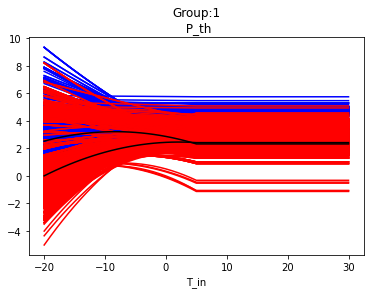

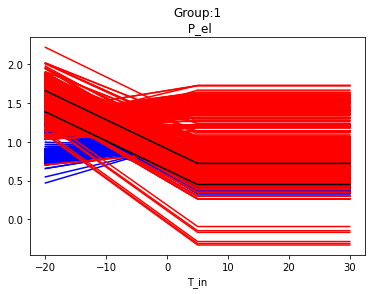

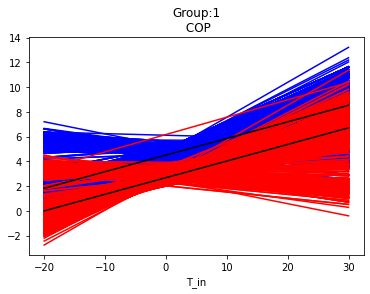

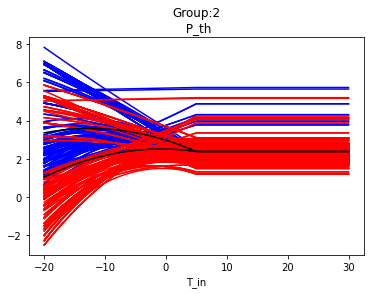

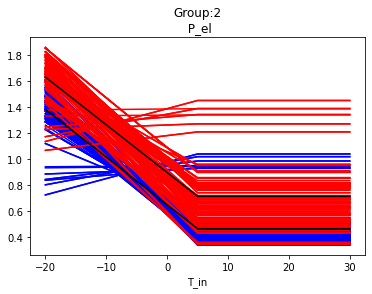

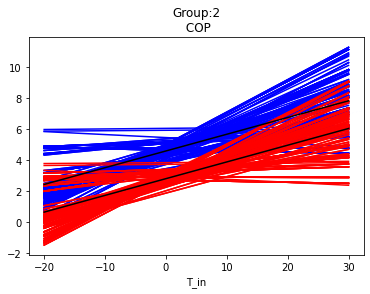

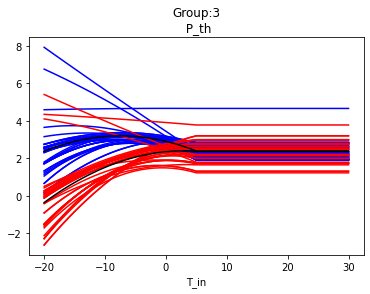

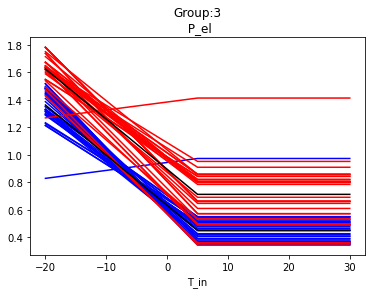

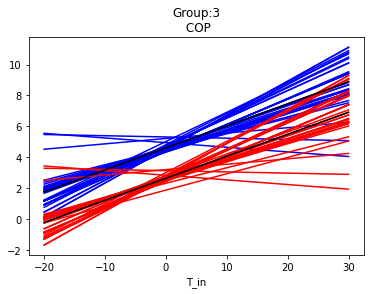

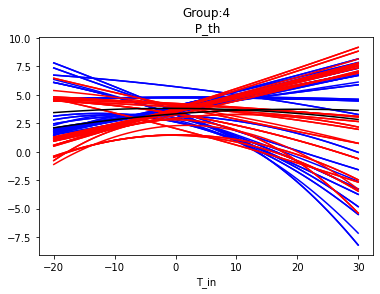

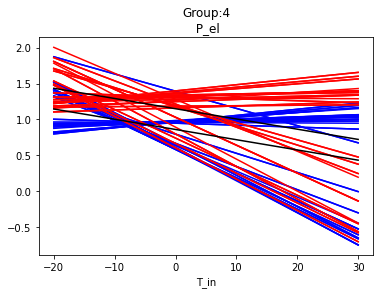

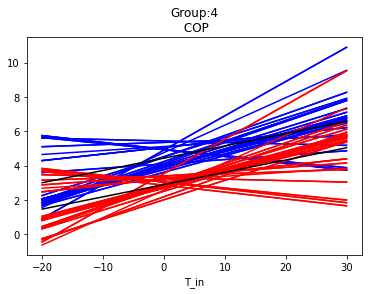

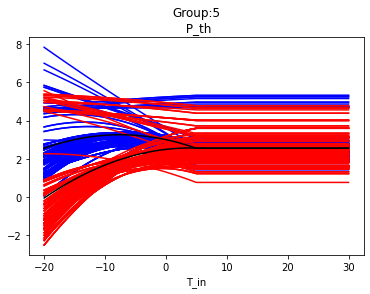

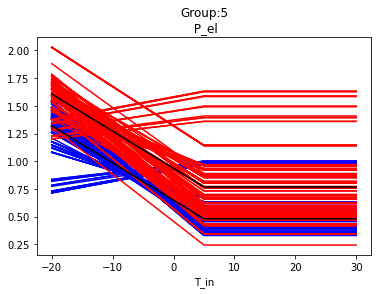

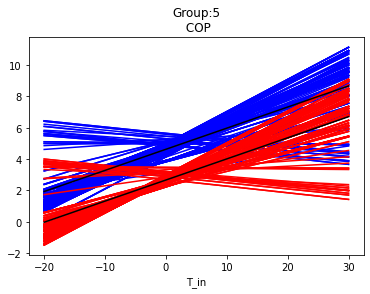

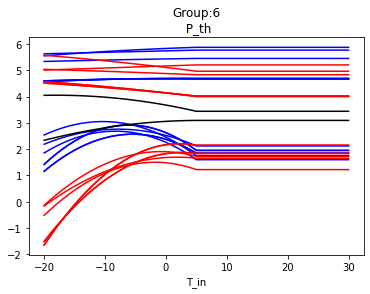

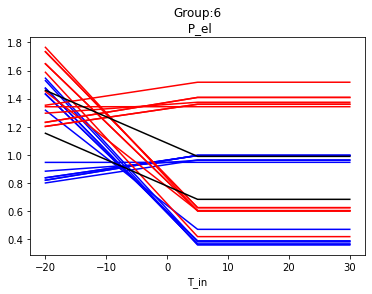

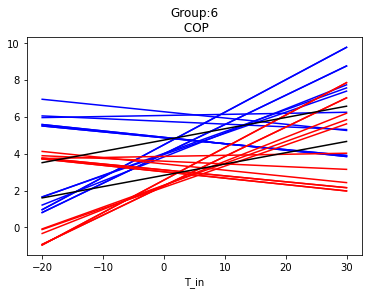

In [10]:
#Plot Pth, Pel and COP with real parameters
Groups=[*range(1,7,1)] #define wich groups to plot
for groups_c in Groups:
    Group1=para1.loc[para['Group']==groups_c,:] 
    T_in=[*range(-20,31,1)]#inflow TEMP
    T_out=[30,50]
    #get parameters
    K1=Group1['k1'].values.tolist() 
    K2=Group1['k2'].values.tolist()
    K3=Group1['k3'].values.tolist()
    K4=Group1['k4'].values.tolist()
    K5=Group1['k5'].values.tolist()
    K6=Group1['k6'].values.tolist()
    K7=Group1['k7'].values.tolist()
    K8=Group1['k8'].values.tolist()
    K9=Group1['k9'].values.tolist()
    Models= Group1['Model'].values.tolist()
    i=0 #iterator for-loop
    #create Dataframes to plot
    P_th_low_g=pd.DataFrame()
    P_th_low_g['T_in']=T_in
    P_th_high_g=pd.DataFrame()
    P_th_high_g['T_in']=T_in
    P_el_low_g=pd.DataFrame()
    P_el_low_g['T_in']=T_in
    P_el_high_g=pd.DataFrame()
    P_el_high_g['T_in']=T_in
    COP_low_g=pd.DataFrame()
    COP_low_g['T_in']=T_in
    COP_high_g=pd.DataFrame()
    COP_high_g['T_in']=T_in
    Average_g=pd.DataFrame()
    Average_g['T_in']=T_in
    #get average values
    k1_average=Group1['k1'].mean(0)
    k2_average=Group1['k2'].mean(0)
    k3_average=Group1['k3'].mean(0)
    k4_average=Group1['k4'].mean(0)
    k5_average=Group1['k5'].mean(0)
    k6_average=Group1['k6'].mean(0)
    k7_average=Group1['k7'].mean(0)
    k8_average=Group1['k8'].mean(0)
    k9_average=Group1['k9'].mean(0)
    
    for number in K1: #iterate by all models
        P_th_low=[]
        P_th_high=[]
        P_el_low=[]
        P_el_high=[]
        COP_low=[]
        COP_high=[]
        Average_pth_low=[]
        Average_pel_low=[]
        Average_cop_low=[]
        Average_pth_high=[]
        Average_pel_high=[]
        Average_cop_high=[]
        for tin in T_in: #calculate Thermal and electric Power and COP
            if tin>5: #this is the temperature where inverter Heatpumps use minimum energy
                if groups_c== (4 or 5 or 6):
                    p_th_low = getP_th(tin,T_out[0],K4[i],K5[i],K6[i],K7[i],K8[i],K9[i])
                    p_th_high = getP_th(tin,T_out[1],K4[i],K5[i],K6[i],K7[i],K8[i],K9[i])
                    p_el_low = K4[i] * tin + K5[i] * T_out[0] + K6[i]
                    p_el_high = K4[i] * tin + K5[i] * T_out[1] + K6[i]
                    average_pthlow = getP_th(tin,T_out[0],k4_average,k5_average,k6_average,k7_average,k8_average,k9_average)
                    average_pthhigh = getP_th(tin,T_out[1],k4_average,k5_average,k6_average,k7_average,k8_average,k9_average)
                    average_pellow= k4_average * tin + k5_average * T_out[0] + k6_average
                    average_pelhigh= k4_average * tin + k5_average * T_out[1] + k6_average
                else:
                    p_th_low = getP_th(5,T_out[0],K4[i],K5[i],K6[i],K7[i],K8[i],K9[i])
                    p_th_high = getP_th(5,T_out[1],K4[i],K5[i],K6[i],K7[i],K8[i],K9[i])
                    p_el_low = K4[i] * 5 + K5[i] * T_out[0] + K6[i]
                    p_el_high = K4[i] * 5 + K5[i] * T_out[1] + K6[i]
                    average_pthlow = getP_th(5,T_out[0],k4_average,k5_average,k6_average,k7_average,k8_average,k9_average)
                    average_pthhigh = getP_th(5,T_out[1],k4_average,k5_average,k6_average,k7_average,k8_average,k9_average)
                    average_pellow= k4_average * 5 + k5_average * T_out[0] + k6_average
                    average_pelhigh= k4_average * 5 + k5_average * T_out[1] + k6_average
            else:
                p_th_low = getP_th(tin,T_out[0],K4[i],K5[i],K6[i],K7[i],K8[i],K9[i])
                p_th_high = getP_th(tin,T_out[1],K4[i],K5[i],K6[i],K7[i],K8[i],K9[i])
                p_el_low = K4[i] * tin + K5[i] * T_out[0] + K6[i]
                p_el_high = K4[i] * tin + K5[i] * T_out[1] + K6[i]
                average_pthlow = getP_th(tin,T_out[0],k4_average,k5_average,k6_average,k7_average,k8_average,k9_average)
                average_pthhigh = getP_th(tin,T_out[1],k4_average,k5_average,k6_average,k7_average,k8_average,k9_average)
                average_pellow= k4_average * tin + k5_average * T_out[0] + k6_average
                average_pelhigh= k4_average * tin + k5_average * T_out[1] + k6_average
            P_th_low.append(p_th_low)
            P_th_high.append(p_th_high)
            P_el_low.append(p_el_low)
            P_el_high.append(p_el_high)
            cop_low = K7[i] * tin + K8[i] * T_out[0] + K9[i]
            COP_low.append(cop_low)
            cop_high = K7[i] * tin + K8[i] * T_out[1] + K9[i]
            COP_high.append(cop_high)
            #calculate for average values
            Average_pth_low.append(average_pthlow)
            Average_pth_high.append(average_pthhigh)
            Average_pel_low.append(average_pellow)
            Average_pel_high.append(average_pelhigh)
            average_low= k7_average * tin + k8_average * T_out[0] + k9_average
            average_high= k7_average * tin + k8_average * T_out[1] + k9_average
            Average_cop_low.append(average_low)
            Average_cop_high.append(average_high)

        #write values in a dataframe
        P_th_low_g[Models[i]]=P_th_low
        P_th_high_g[Models[i]]=P_th_high
        P_el_low_g[Models[i]]=P_el_low
        P_el_high_g[Models[i]]=P_el_high
        COP_low_g[Models[i]]=COP_low
        COP_high_g[Models[i]]=COP_high
        Average_g['P_th_low']=Average_pth_low
        Average_g['P_el_low']=Average_pel_low
        Average_g['COP_low']=Average_cop_low
        Average_g['P_th_high']=Average_pth_high
        Average_g['P_el_high']=Average_pel_high
        Average_g['COP_high']=Average_cop_high
        i=i+1 #increase iterator


    #Plot: thermal power
    fig, axes = plt.subplots(nrows=1, ncols=1)
    variable=str(groups_c)
    P_th_low_g.plot(ax=axes, x='T_in', y=Models, kind='line', c='Blue', title='Group:' + variable + '\n P_th', legend=False)
    P_th_high_g.plot(ax=axes, x='T_in', y=Models, kind='line', c='Red', legend=False)
    Average_g.plot(ax=axes, x='T_in', y='P_th_low', kind='line', c='Black', legend=False)
    Average_g.plot(ax=axes, x='T_in', y='P_th_high', kind='line', c='Black', legend=False)
    plt.show()

    #Plot: electric Power
    fig, axes = plt.subplots(nrows=1, ncols=1)
    
    P_el_low_g.plot(ax=axes, x='T_in', y=Models, kind='line', c='Blue', title='Group:' + variable + '\n P_el', legend=False)
    P_el_high_g.plot(ax=axes, x='T_in', y=Models, kind='line', c='Red', legend=False)
    Average_g.plot(ax=axes, x='T_in', y='P_el_low', kind='line', c='Black', legend=False)
    Average_g.plot(ax=axes, x='T_in', y='P_el_high', kind='line', c='Black', legend=False)
    plt.show()

    #Plot:COP
    fig, axes = plt.subplots(nrows=1, ncols=1)

    COP_low_g.plot(ax=axes, x='T_in', y=Models, kind='line', c='Blue', title='Group:' + variable + '\n COP', legend=False)
    COP_high_g.plot(ax=axes, x='T_in', y=Models, kind='line', c='Red', legend=False)
    Average_g.plot(ax=axes, x='T_in', y='COP_low', kind='line', c='Black', legend=False)
    Average_g.plot(ax=axes, x='T_in', y='COP_high', kind='line', c='Black', legend=False)
    plt.show()
    #graphics.to_csv(variable + '.csv', encoding='utf-8', index=False)

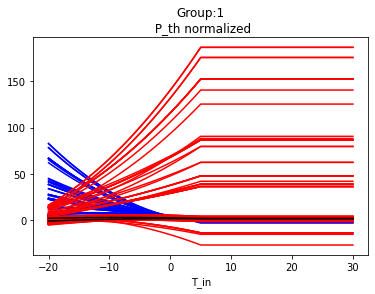

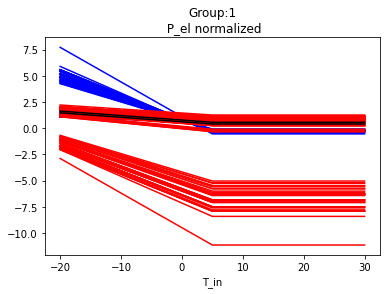

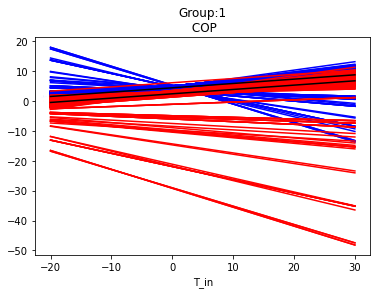

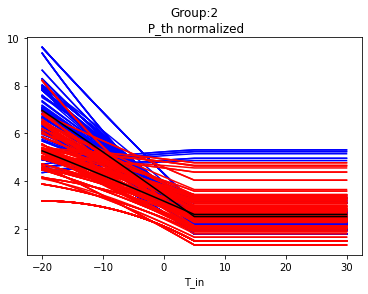

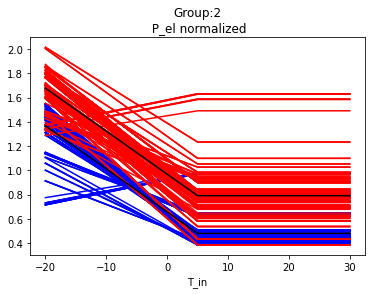

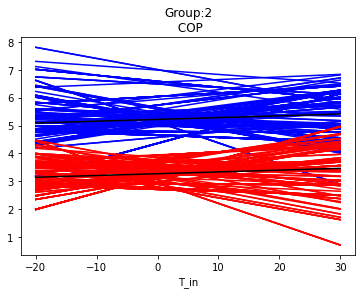

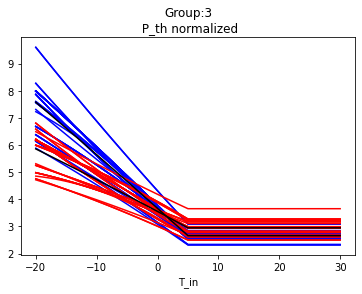

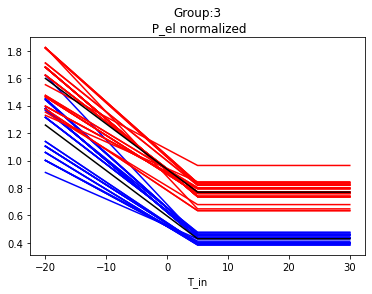

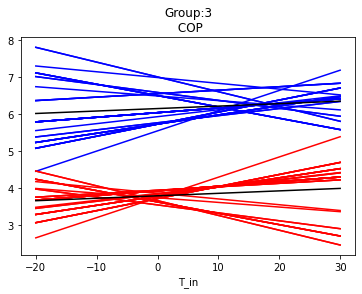

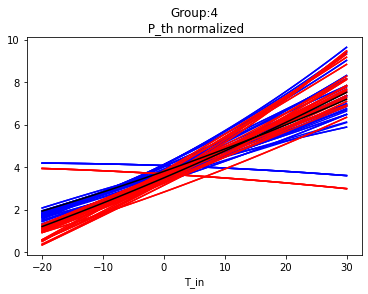

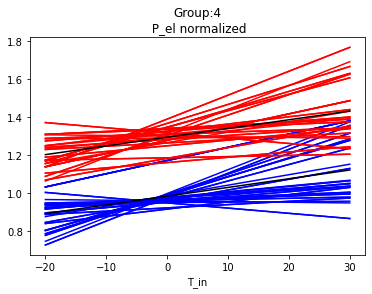

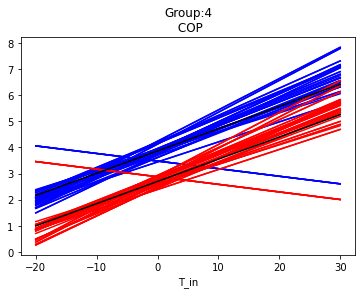

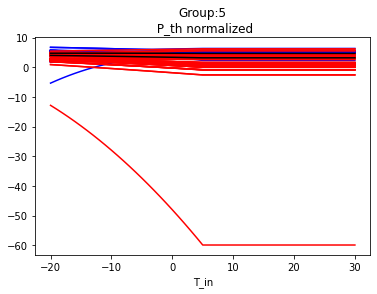

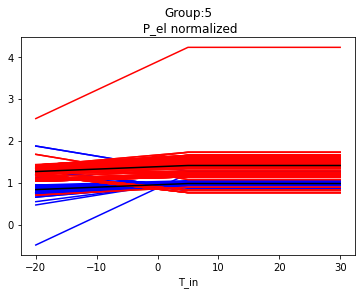

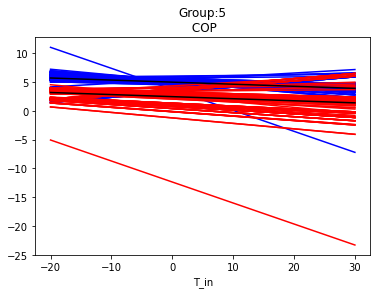

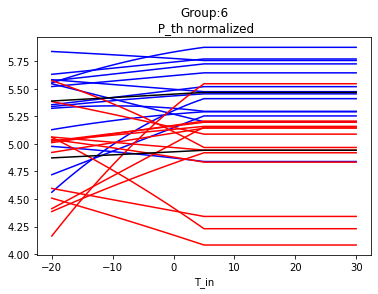

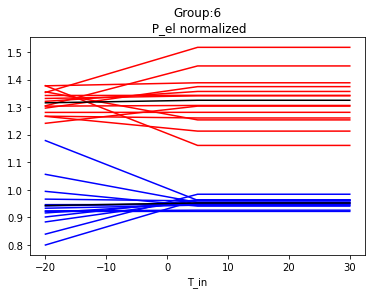

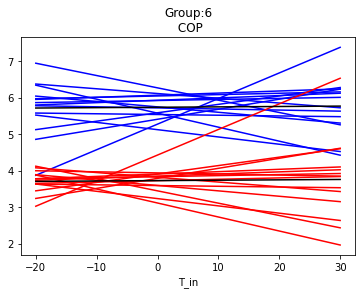

In [5]:
#plot Pth,Pel,COP for all models
Groups=[*range(1,7,1)] #define wich groups to plot
for groups_c in Groups:
    Group1=para1.loc[para1['Group']==groups_c,:] 
    T_in=[*range(-20,31,1)]#inflow TEMP
    T_out=[30,50]
    #get parameters
    K1=Group1['k1'].values.tolist() 
    K2=Group1['k2'].values.tolist()
    K3=Group1['k3'].values.tolist()
    K4=Group1['k4'].values.tolist()
    K5=Group1['k5'].values.tolist()
    K6=Group1['k6'].values.tolist()
    K7=Group1['k7'].values.tolist()
    K8=Group1['k8'].values.tolist()
    K9=Group1['k9'].values.tolist()
    Models= Group1['Model'].values.tolist()
    i=0 #iterator for-loop
    #create Dataframes to plot
    P_th_low_g=pd.DataFrame()
    P_th_low_g['T_in']=T_in
    P_th_high_g=pd.DataFrame()
    P_th_high_g['T_in']=T_in
    P_el_low_g=pd.DataFrame()
    P_el_low_g['T_in']=T_in
    P_el_high_g=pd.DataFrame()
    P_el_high_g['T_in']=T_in
    COP_low_g=pd.DataFrame()
    COP_low_g['T_in']=T_in
    COP_high_g=pd.DataFrame()
    COP_high_g['T_in']=T_in
    Average_g=pd.DataFrame()
    Average_g['T_in']=T_in
    #get average values
    k1_average=Group1['k1'].mean(0)
    k2_average=Group1['k2'].mean(0)
    k3_average=Group1['k3'].mean(0)
    k4_average=Group1['k4'].mean(0)
    k5_average=Group1['k5'].mean(0)
    k6_average=Group1['k6'].mean(0)
    k7_average=Group1['k7'].mean(0)
    k8_average=Group1['k8'].mean(0)
    k9_average=Group1['k9'].mean(0)
    
    for number in K1: #iterate by all models
        P_th_low=[]
        P_th_high=[]
        P_el_low=[]
        P_el_high=[]
        COP_low=[]
        COP_high=[]
        Average_pth_low=[]
        Average_pel_low=[]
        Average_cop_low=[]
        Average_pth_high=[]
        Average_pel_high=[]
        Average_cop_high=[]
        for tin in T_in: #calculate Thermal and electric Power and COP
            if tin>5: #this is the temperature where inverter Heatpumps use minimum energy
                if groups_c== (4 or 5 or 6):
                    p_th_low = getP_th(tin,T_out[0],K4[i],K5[i],K6[i],K7[i],K8[i],K9[i])
                    p_th_high = getP_th(tin,T_out[1],K4[i],K5[i],K6[i],K7[i],K8[i],K9[i])
                    p_el_low = K4[i] * tin + K5[i] * T_out[0] + K6[i]
                    p_el_high = K4[i] * tin + K5[i] * T_out[1] + K6[i]
                    average_pthlow = getP_th(tin,T_out[0],k4_average,k5_average,k6_average,k7_average,k8_average,k9_average)
                    average_pthhigh = getP_th(tin,T_out[1],k4_average,k5_average,k6_average,k7_average,k8_average,k9_average)
                    average_pellow= k4_average * tin + k5_average * T_out[0] + k6_average
                    average_pelhigh= k4_average * tin + k5_average * T_out[1] + k6_average
                else:
                    p_th_low = getP_th(5,T_out[0],K4[i],K5[i],K6[i],K7[i],K8[i],K9[i])
                    p_th_high = getP_th(5,T_out[1],K4[i],K5[i],K6[i],K7[i],K8[i],K9[i])
                    p_el_low = K4[i] * 5 + K5[i] * T_out[0] + K6[i]
                    p_el_high = K4[i] * 5 + K5[i] * T_out[1] + K6[i]
                    average_pthlow = getP_th(5,T_out[0],k4_average,k5_average,k6_average,k7_average,k8_average,k9_average)
                    average_pthhigh = getP_th(5,T_out[1],k4_average,k5_average,k6_average,k7_average,k8_average,k9_average)
                    average_pellow= k4_average * 5 + k5_average * T_out[0] + k6_average
                    average_pelhigh= k4_average * 5 + k5_average * T_out[1] + k6_average
            else:
                p_th_low = getP_th(tin,T_out[0],K4[i],K5[i],K6[i],K7[i],K8[i],K9[i])
                p_th_high = getP_th(tin,T_out[1],K4[i],K5[i],K6[i],K7[i],K8[i],K9[i])
                p_el_low = K4[i] * tin + K5[i] * T_out[0] + K6[i]
                p_el_high = K4[i] * tin + K5[i] * T_out[1] + K6[i]
                average_pthlow = getP_th(tin,T_out[0],k4_average,k5_average,k6_average,k7_average,k8_average,k9_average)
                average_pthhigh = getP_th(tin,T_out[1],k4_average,k5_average,k6_average,k7_average,k8_average,k9_average)
                average_pellow= k4_average * tin + k5_average * T_out[0] + k6_average
                average_pelhigh= k4_average * tin + k5_average * T_out[1] + k6_average
            P_th_low.append(p_th_low)
            P_th_high.append(p_th_high)
            P_el_low.append(p_el_low)
            P_el_high.append(p_el_high)
            cop_low = K7[i] * tin + K8[i] * T_out[0] + K9[i]
            COP_low.append(cop_low)
            cop_high = K7[i] * tin + K8[i] * T_out[1] + K9[i]
            COP_high.append(cop_high)
            #calculate for average values
            Average_pth_low.append(average_pthlow)
            Average_pth_high.append(average_pthhigh)
            Average_pel_low.append(average_pellow)
            Average_pel_high.append(average_pelhigh)
            average_low= k7_average * tin + k8_average * T_out[0] + k9_average
            average_high= k7_average * tin + k8_average * T_out[1] + k9_average
            Average_cop_low.append(average_low)
            Average_cop_high.append(average_high)

        #write values in a dataframe
        P_th_low_g[Models[i]]=P_th_low
        P_th_high_g[Models[i]]=P_th_high
        P_el_low_g[Models[i]]=P_el_low
        P_el_high_g[Models[i]]=P_el_high
        COP_low_g[Models[i]]=COP_low
        COP_high_g[Models[i]]=COP_high
        Average_g['P_th_low']=Average_pth_low
        Average_g['P_el_low']=Average_pel_low
        Average_g['COP_low']=Average_cop_low
        Average_g['P_th_high']=Average_pth_high
        Average_g['P_el_high']=Average_pel_high
        Average_g['COP_high']=Average_cop_high
        i=i+1 #increase iterator


    #Plot: thermal power
    fig, axes = plt.subplots(nrows=1, ncols=1)
    variable=str(groups_c)
    P_th_low_g.plot(ax=axes, x='T_in', y=Models, kind='line', c='Blue', title='Group:' + variable + '\n P_th normalized', legend=False)
    P_th_high_g.plot(ax=axes, x='T_in', y=Models, kind='line', c='Red', legend=False)
    Average_g.plot(ax=axes, x='T_in', y='P_th_low', kind='line', c='Black', legend=False)
    Average_g.plot(ax=axes, x='T_in', y='P_th_high', kind='line', c='Black', legend=False)
    plt.show()

    #Plot: electric Power
    fig, axes = plt.subplots(nrows=1, ncols=1)
    
    P_el_low_g.plot(ax=axes, x='T_in', y=Models, kind='line', c='Blue', title='Group:' + variable + '\n P_el normalized', legend=False)
    P_el_high_g.plot(ax=axes, x='T_in', y=Models, kind='line', c='Red', legend=False)
    Average_g.plot(ax=axes, x='T_in', y='P_el_low', kind='line', c='Black', legend=False)
    Average_g.plot(ax=axes, x='T_in', y='P_el_high', kind='line', c='Black', legend=False)
    plt.show()

    #Plot:COP
    fig, axes = plt.subplots(nrows=1, ncols=1)

    COP_low_g.plot(ax=axes, x='T_in', y=Models, kind='line', c='Blue', title='Group:' + variable + '\n COP', legend=False)
    COP_high_g.plot(ax=axes, x='T_in', y=Models, kind='line', c='Red', legend=False)
    Average_g.plot(ax=axes, x='T_in', y='COP_low', kind='line', c='Black', legend=False)
    Average_g.plot(ax=axes, x='T_in', y='COP_high', kind='line', c='Black', legend=False)
    plt.show()
    #graphics.to_csv(variable + '.csv', encoding='utf-8', index=False)